# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [26]:
# Import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.info()
# no hay información faltante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [9]:
# Your code here:
print(f"La data tiene {sensor.shape[0]} filas y {sensor.shape[1]} columnas")


La data tiene 1751 filas y 12 columnas


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [16]:
# Your code here:
index=pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=sensor.shape[0])


Assign the time series index to the dataframe's index.

In [6]:
# Your code here:
sensor.set_index(index, inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `period=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

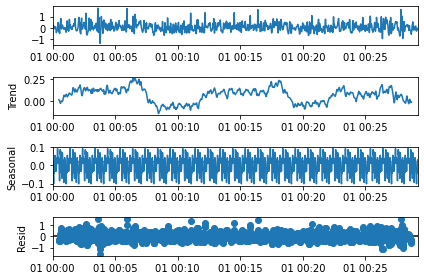

In [39]:
# Your code here:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = 6,4
decomp_add = sm.tsa.seasonal_decompose(sensor[['userAcceleration.x']], period=60)
decomp_add.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

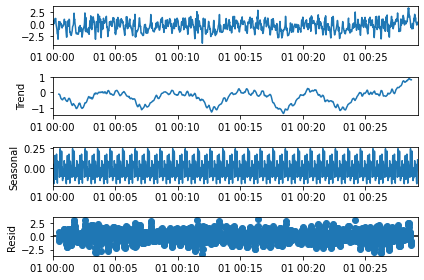

In [40]:
# Your code here:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = 6,4
decomp_add = sm.tsa.seasonal_decompose(sensor[['rotationRate.x']], period=60)
decomp_add.plot()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

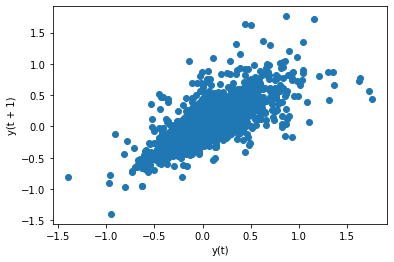

In [41]:
# Your code here:
pd.plotting.lag_plot(sensor[['userAcceleration.x']])


Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

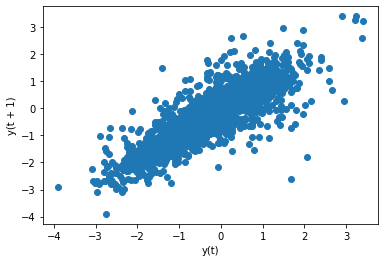

In [42]:
# Your code here:

pd.plotting.lag_plot(sensor[['rotationRate.x']])


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
# Las gráficas sugieren que existe una correlación positiva entre el tiempo y cada una de las variables.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [45]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

rotation_result = adfuller(sensor['rotationRate.x'])
acceleration_result = adfuller(sensor['userAcceleration.x'])

(-5.269860625086419,
 6.320230335912299e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [47]:
print('Resultados para la variable rotationRate.x')
print('ADF Statistic: %f' % rotation_result[0])
print('p-value: %f' % rotation_result[1])
print('Valores críticos:')
for key, value in rotation_result[4].items():
	print('\t%s: %.3f' % (key, value))
print('---------->-----------------')

print('Resultados para la variable userAcceleration.x')
print('ADF Statistic: %f' % acceleration_result[0])
print('p-value: %f' % acceleration_result[1])
print('Valores críticos:')
for key, value in acceleration_result[4].items():
	print('\t%s: %.3f' % (key, value))
print('---------->-----------------')

Resultados para la variable rotationRate.x
ADF Statistic: -5.269861
p-value: 0.000006
Valores críticos:
	1%: -3.434
	5%: -2.863
	10%: -2.568
---------->-----------------
Resultados para la variable userAcceleration.x
ADF Statistic: -17.957994
p-value: 0.000000
Valores críticos:
	1%: -3.434
	5%: -2.863
	10%: -2.568
---------->-----------------


What are your conclusions from this test?

In [13]:
# Your conclusions here:
# Dado que el resultado de la prueba ADF para ambas variables es menor que en el 1% y que el p-value es menor a 0.05
# se rechaza la hipótesis nula, es decir, nuestro data set es estacionario con una probabilidad de 99%.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [111]:
# Your code here:
from statsmodels.tsa.arima.model import ARIMA
test, train = model_selection.train_test_split(sensor['userAcceleration.x'], test_size=0.1, random_state=42)
test = sensor['userAcceleration.x'][-10:]
train = sensor['userAcceleration.x'][:len(sensor)-10]
arima_= ARIMA(train, order=(2, 0,1)).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


In [112]:
arima_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Sun, 13 Feb 2022   AIC                           -736.803
Time:                        10:19:39   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.000      -0.443      -0.315
ma.L1          0.1824      0.039      4.643      0.000       0.105       0.259
sigma2         0.0381      0.001     46.070      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.70
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.34
Prob(H) (two-sided):                  0.60   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [142]:
predicciones=[arima_.predict(x) for x in test.reset_index()['index']]

In [143]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
rmse(test, predicciones)

array([0.07659774, 0.06046807, 0.25642081, 0.38656511, 0.35655019,
       0.35475442, 0.19076805, 0.17431595, 0.13807285, 0.15434532])